In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

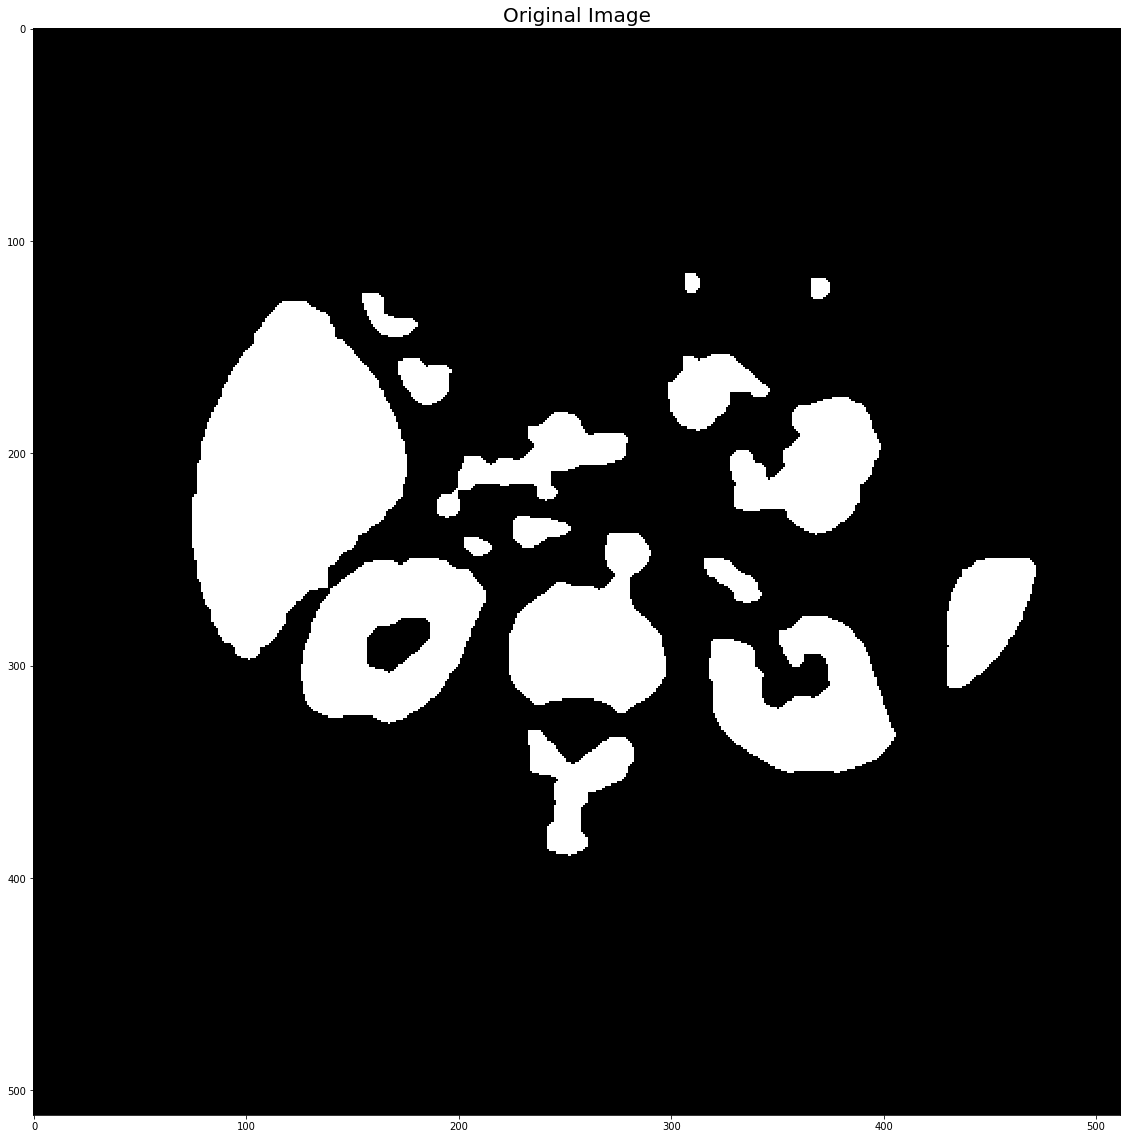

In [3]:
img = cv2.imread('../input_data/kidney.jpg', cv2.IMREAD_GRAYSCALE)
img = (img > 132).astype(np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6)))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))
img = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)), iterations = 3)
images = []
subtitles = []
images.append(img)
subtitles.append('Original Image')
display_images(images, 1, 1, (20, 20), '', subtitles)

In [4]:
visited = np.zeros(img.shape)

In [5]:
def dfs(row, col, color):
    if row < 0 or col < 0 or row >= img.shape[0] or col >= img.shape[1]:
        return 0
    if img[row][col] == 0:
        return 0
    if visited[row][col] != 0:
        return 0
    visited[row][col] = color
    return (1 + dfs(row + 1, col, color) + dfs(row - 1, col, color) + dfs(row, col + 1, color) + dfs(row, col - 1, color) + dfs(row + 1, col + 1, color) + dfs(row + 1, col - 1, color) + dfs(row - 1, col + 1, color) + dfs(row - 1, col - 1, color))

In [6]:
import sys
sys.setrecursionlimit(100000)
color = 1
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] == 0 and img[i][j] == 1:
            dfs(i, j, color)
            color += 1
        else:
            continue
print(color)

17


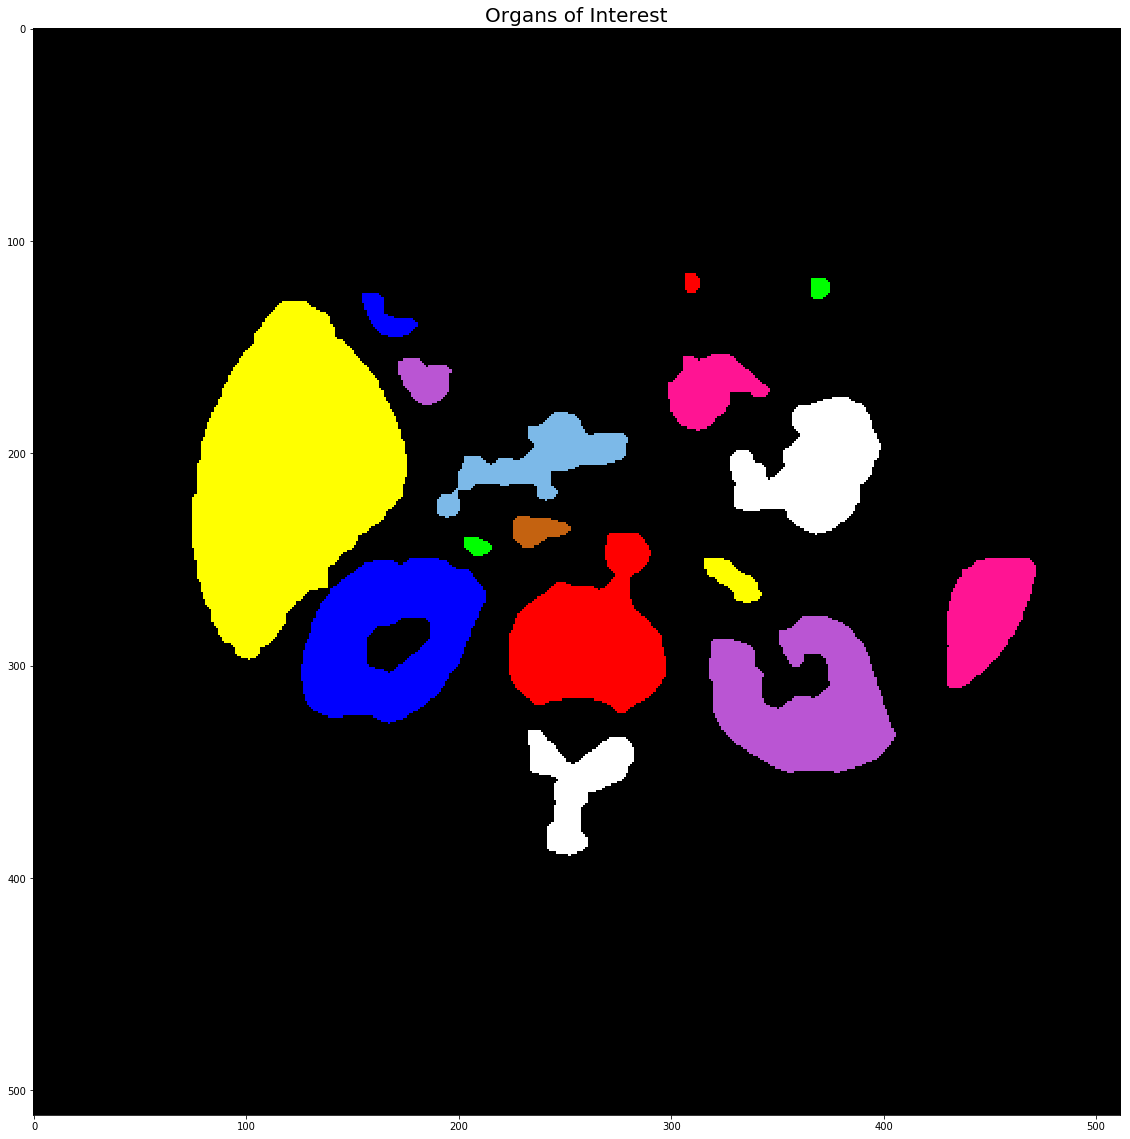

In [7]:
COLORS = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255,20,147), (186,85,211), (255, 255, 255), (124,185,232), (196,98,16)]
output = np.zeros((img.shape[0], img.shape[1], 3))
for c in range(color-1):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if visited[i][j] == (c+1):
                ccc = np.random.randint(0, 5)
                output[i][j][0] = COLORS[c % 9][0]
                output[i][j][1] = COLORS[c % 9][1]
                output[i][j][2] = COLORS[c % 9][2]
output = output.astype(np.uint8)
images = []
subtitles = []
images.append(output)
subtitles.append('Organs of Interest')
display_images(images, 1, 1, (20, 20), '', subtitles)